# Neural Network on Toy Data

Output of data is simply sum of inputs

In [4]:
import torch

# Define inputs and outputs
x = [
    [1,2],
    [3,4],
    [5,6],
    [7,8]
]

y = [
    [3],
    [7],
    [11],
    [15]
]

# Convert to tensor
X = torch.tensor(x).float()     # When multiplied by decimals (weights) they become float
Y = torch.tensor(y).float()

# Device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)


In [21]:
# Model Architecture

import torch.nn as nn 

class MyNeuralNet(nn.Module):   # nn.Module is base class for all neural network modules
    def __init__(self):
        super().__init__()      # Ensures that class inherits from nn.Module

        self.input_to_hidden_layer = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x 

In [23]:
# Checking parameters

mynet = MyNeuralNet().to(device)
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.4445,  0.0060],
        [ 0.3637, -0.2005],
        [-0.6692, -0.1838],
        [-0.0945, -0.3630],
        [-0.3055,  0.2011],
        [ 0.3776, -0.3497],
        [ 0.2519, -0.2699],
        [ 0.6976, -0.2471]], device='cuda:0', requires_grad=True)

In [19]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.6931,  0.4397],
        [-0.2166, -0.2142],
        [-0.5716,  0.0952],
        [-0.2807,  0.4492],
        [-0.3619, -0.5396],
        [-0.4714,  0.0625],
        [ 0.2184, -0.5905],
        [-0.0908,  0.4519]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.1415, -0.6377,  0.2288,  0.0052, -0.1790,  0.1364, -0.1241, -0.2136],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.1206,  0.0778, -0.2517,  0.1414,  0.0425, -0.1415,  0.3371, -0.3532]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([0.3039], device='cuda:0', requires_grad=True)


In [24]:
# Loss Function
loss_fn = nn.MSELoss()

# Loss value
_Y = mynet(X)
loss_value = loss_fn(_Y, Y)
print(loss_value)

tensor(106.0428, device='cuda:0', grad_fn=<MseLossBackward>)


In [25]:
# Optimizer

from torch.optim import SGD 
optimizer = SGD(mynet.parameters(), lr = 0.001)

In [30]:
# Training loop

loss_history = []

for _ in range(50):
    optimizer.zero_grad()
    loss_value = loss_fn(mynet(X), Y)
    loss_value.backward()
    optimizer.step()
    loss_history.append(loss_value)

Text(0, 0.5, 'loss')

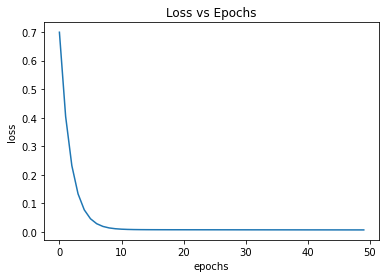

In [31]:
# Loss Plot

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(loss_history)
plt.title("Loss vs Epochs")
plt.xlabel("epochs")
plt.ylabel("loss")